## Observations and Insights

* Comment

## Dependencies and starter code

In [415]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse = "C:/Users/Laptop/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
results = "C:/Users/Laptop/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Homework/05-Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse)
results_df = pd.read_csv(results)

In [416]:
#mouse_df.head()

In [417]:
#results_df.head()

In [418]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_df, results_df, on="Mouse ID")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics
* Summary statistics of Tumor Volume (mm3) by Drug Regimen

In [419]:
summary = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))
summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [420]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# mean = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean())
# mean = mean.rename(columns={"Tumor Volume (mm3)":" Mean Tumor Volume"})

# median = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median())
# median = median.rename(columns={"Tumor Volume (mm3)":" Median Tumor Volume"})

# var = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var())
# var = var.rename(columns={"Tumor Volume (mm3)":" Variance Tumor Volume"})

# stdev = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std())
# stdev = stdev.rename(columns={"Tumor Volume (mm3)":" StDev Tumor Volume"})

# sem = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem())
# sem = sem.rename(columns={"Tumor Volume (mm3)":" SEM Tumor Volume"})

# stat_merge = pd.merge(mean, median, on="Drug Regimen")
# stat_merge = pd.merge(stat_merge, var, on="Drug Regimen")
# stat_merge = pd.merge(stat_merge, stdev, on="Drug Regimen")
# stat_merge = pd.merge(stat_merge, sem, on="Drug Regimen")
# stat_merge

## Bar Plots

In [421]:
count = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Mouse ID"].count())
count = count[["Mouse ID"]]

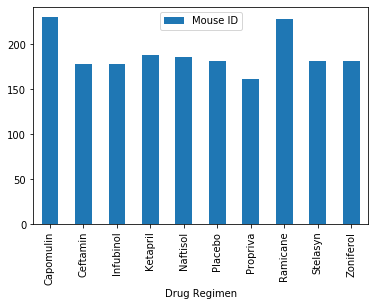

In [422]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count.plot.bar()

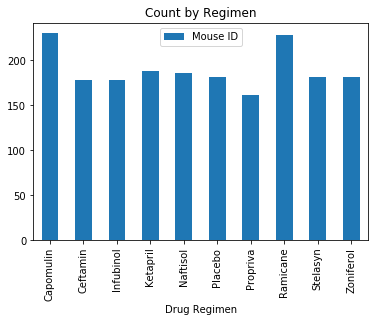

In [423]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count.plot(kind="bar")
plt.title("Count by Regimen")
plt.show()

## Pie Plots

In [424]:
gender = pd.DataFrame(merged_df.groupby(['Sex'])["Mouse ID"].count())
gender = gender[["Mouse ID"]]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B360E9F408>],
      dtype=object)

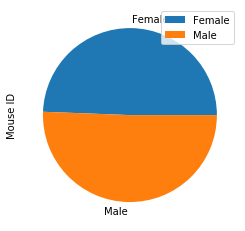

In [425]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender.plot.pie(subplots=True)

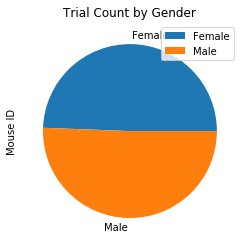

In [426]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender.plot(kind="pie",subplots=True)
plt.title("Trial Count by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [427]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
tumorvol = pd.DataFrame(merged_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sum())
tumorvol = tumorvol.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
tumorvol = tumorvol.sort_values("Tumor Volume (mm3)", ascending=True)
tumorvol

,Tumor Volume (mm3)
Drug Regimen,
Ramicane,9169.417875
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529


#### CAPOMULIN

In [428]:
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

Q1_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 25)
Q2_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 50)
Q3_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 75)
IQR_cap = Q3_cap - Q1_cap
upper_boundary_cap = Q3_cap + (1.5 * IQR_cap)
lower_boundary_cap = Q1_cap - (1.5 * IQR_cap)

low_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] <= lower_boundary_cap]
low_outliers_cap = low_outliers_cap['Tumor Volume (mm3)'].count()

high_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] >= upper_boundary_cap]
high_outliers_cap = high_outliers_cap['Tumor Volume (mm3)'].count()

# print("==========================================")
# print("(Q1) Lower Quartile: %s"%(Q1_cap))
# print("(Q2) Median: %s"%(Q2_cap))
# print("(Q3) Upper Quartile: %s"%(Q3_cap))
# print("Interquartile Range: %s"%(IQR_cap))
# print("Upper Boundary: %s"%(upper_boundary_cap))
# print("Lower Boundary: %s"%(lower_boundary_cap))
print("==========================================")
print("Low outlier(s) count: %s"%(low_outliers_cap))
print("High outlier(s) count: %s"%(high_outliers_cap))
print("==========================================")

Low outlier(s) count: 2
High outlier(s) count: 0


#### RAMICANE

In [429]:
ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
Q1_ram = np.percentile(ramicane['Tumor Volume (mm3)'], 25)
Q2_ram = np.percentile(ramicane['Tumor Volume (mm3)'], 50)
Q3_ram = np.percentile(ramicane['Tumor Volume (mm3)'], 75)
IQR_ram = Q3_ram - Q1_ram
upper_boundary_ram = Q3_ram + (1.5 * IQR_ram)
lower_boundary_ram = Q1_ram - (1.5 * IQR_ram)

low_outliers_ram = ramicane[ramicane['Tumor Volume (mm3)'] <= lower_boundary_ram]
low_outliers_ram = low_outliers_ram['Tumor Volume (mm3)'].count()

high_outliers_ram = ramicane[ramicane['Tumor Volume (mm3)'] >= upper_boundary_ram]
high_outliers_ram = high_outliers_ram['Tumor Volume (mm3)'].count()

# print("==========================================")
# print("(Q1) Lower Quartile: %s"%(Q1_ram))
# print("(Q2) Median: %s"%(Q2_ram))
# print("(Q3) Upper Quartile: %s"%(Q3_ram))
# print("Interquartile Range: %s"%(IQR_ram))
# print("Upper Boundary: %s"%(upper_boundary_ram))
# print("Lower Boundary: %s"%(lower_boundary_ram))
print("==========================================")
print("Low outlier(s) count: %s"%(low_outliers_ram))
print("High outlier(s) count: %s"%(high_outliers_ram))
print("==========================================")

Low outlier(s) count: 1
High outlier(s) count: 0


#### INFUBINOL

In [430]:
infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
Q1_inf = np.percentile(infubinol['Tumor Volume (mm3)'], 25)
Q2_inf = np.percentile(infubinol['Tumor Volume (mm3)'], 50)
Q3_inf = np.percentile(infubinol['Tumor Volume (mm3)'], 75)
IQR_inf = Q3_inf - Q1_inf
upper_boundary_inf = Q3_inf + (1.5 * IQR_inf)
lower_boundary_inf = Q1_inf - (1.5 * IQR_inf)

low_outliers_inf = infubinol[infubinol['Tumor Volume (mm3)'] <= lower_boundary_inf]
low_outliers_inf = low_outliers_inf['Tumor Volume (mm3)'].count()

high_outliers_inf = infubinol[infubinol['Tumor Volume (mm3)'] >= upper_boundary_inf]
high_outliers_inf = high_outliers_inf['Tumor Volume (mm3)'].count()

# print("==========================================")
# print("(Q1) Lower Quartile: %s"%(Q1_inf))
# print("(Q2) Median: %s"%(Q2_inf))
# print("(Q3) Upper Quartile: %s"%(Q3_inf))
# print("Interquartile Range: %s"%(IQR_inf))
# print("Upper Boundary: %s"%(upper_boundary_inf))
# print("Lower Boundary: %s"%(lower_boundary_inf))
print("==========================================")
print("Low outlier(s) count: %s"%(low_outliers_inf))
print("High outlier(s) count: %s"%(high_outliers_inf))
print("==========================================")

Low outlier(s) count: 0
High outlier(s) count: 0


#### CEFTAMIN

In [431]:
ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
Q1_cef = np.percentile(ceftamin['Tumor Volume (mm3)'], 25)
Q2_cef = np.percentile(ceftamin['Tumor Volume (mm3)'], 50)
Q3_cef = np.percentile(ceftamin['Tumor Volume (mm3)'], 75)
IQR_cef = Q3_cef - Q1_cef
upper_boundary_cef = Q3_cef + (1.5 * IQR_cef)
lower_boundary_cef = Q1_cef - (1.5 * IQR_cef)

low_outliers_cef = ceftamin[ceftamin['Tumor Volume (mm3)'] <= lower_boundary_cef]
low_outliers_cef = low_outliers_cef['Tumor Volume (mm3)'].count()

high_outliers_cef = ceftamin[ceftamin['Tumor Volume (mm3)'] >= upper_boundary_cef]
high_outliers_cef = high_outliers_cef['Tumor Volume (mm3)'].count()

# print("==========================================")
# print("(Q1) Lower Quartile: %s"%(Q1_cef))
# print("(Q2) Median: %s"%(Q2_cef))
# print("(Q3) Upper Quartile: %s"%(Q3_cef))
# print("Interquartile Range: %s"%(IQR_cef))
# print("Upper Boundary: %s"%(upper_boundary_cef))
# print("Lower Boundary: %s"%(lower_boundary_cef))
print("==========================================")
print("Low outlier(s) count: %s"%(low_outliers_cef))
print("High outlier(s) count: %s"%(high_outliers_cef))
print("==========================================")

Low outlier(s) count: 0
High outlier(s) count: 0


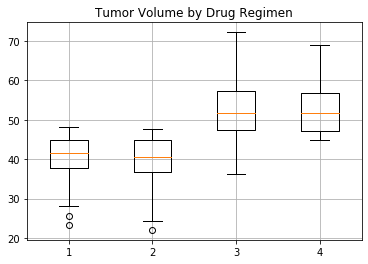

In [432]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
cap_tumors = capomulin['Tumor Volume (mm3)']

ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
ram_tumors = ramicane['Tumor Volume (mm3)']

infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
inf_tumors = infubinol['Tumor Volume (mm3)']

ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
cef_tumors = ceftamin['Tumor Volume (mm3)']

data = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumor Volume by Drug Regimen')
ax7.boxplot(data)
plt.grid()
plt.show()

## Line and scatter plots

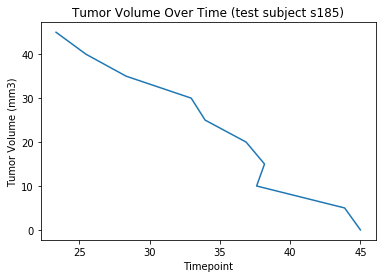

In [463]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line = capomulin.loc[:, ["Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
capomulin_line = capomulin_line.loc[capomulin_line["Mouse ID"] == "s185"]
x_axis = capomulin_line['Tumor Volume (mm3)']
y_axis = capomulin_line['Timepoint']

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume Over Time (test subject s185)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [435]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [436]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

## ---------------------------------------------------------------------------------------------------------------------------
## QUARTILES & OUTLIERS
##### How to calculate quartiles and detect outliers

In [437]:
# capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Q1_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 25)
# Q2_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 50)
# Q3_cap = np.percentile(capomulin['Tumor Volume (mm3)'], 75)
# IQR_cap = Q3_cap - Q1_cap
# upper_boundary_cap = Q3_cap + (1.5 * IQR_cap)
# lower_boundary_cap = Q1_cap - (1.5 * IQR_cap)

# low_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] <= lower_boundary_cap]
# low_outliers_cap = low_outliers_cap['Tumor Volume (mm3)'].count()

# high_outliers_cap = capomulin[capomulin['Tumor Volume (mm3)'] >= upper_boundary_cap]
# high_outliers_cap = high_outliers_cap['Tumor Volume (mm3)'].count()

# print("==========================================")
# print("(Q1) Lower Quartile: %s"%(Q1_cap))
# print("(Q2) Median: %s"%(Q2_cap))
# print("(Q3) Upper Quartile: %s"%(Q3_cap))
# print("Interquartile Range: %s"%(IQR_cap))
# print("Upper Boundary: %s"%(upper_boundary_cap))
# print("Lower Boundary: %s"%(lower_boundary_cap))
# print("==========================================")
# print("Low outlier(s) count: %s"%(low_outliers_cap))
# print("High outlier(s) count: %s"%(high_outliers_cap))
# print("==========================================")

## ---------------------------------------------------------------------------------------------------------------------------
## BOXPLOT
##### How to create a single boxplot

In [438]:
#infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
#inf_tumors = infubinol['Tumor Volume (mm3)']
#fig1, ax1 = plt.subplots()
#ax1.set_title('Infubinol')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(inf_tumors)
#plt.show()